# 次元削減

今回の内容では次元削減を取り扱う。
内容は以下である:


  - 次元削減とは何か
  - 次元削減の目的
  - 主要な次元削減の手法
  - PCA について

## 次元削減とは何か

次元削減とは何かを一言で言えば、データのもつ有益な情報を出来るだけ損なわずにデータの持つ次元（変数の数）を減らす手法のことである。

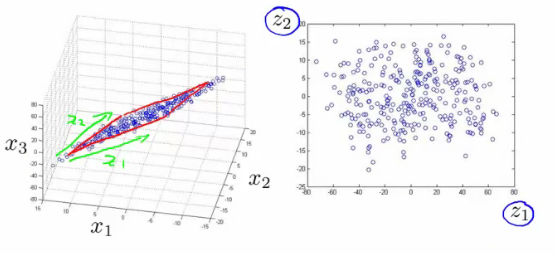

In [2]:
from IPython.display import Image
Image("figures/image-4.png")

上図（https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/ より）は次元削減の例である。
$x_1$、$x_2$, $x_3$で表現される3次元の空間上にあったデータから変数の数を減らして$z_1$、$z_2$で表される2次元の空間に射影している。
この時、適切な平面を選ぶことでデータはうまく縮約された表現となっており、データ点間の距離などの情報がある程度保存されている。

## 次元削減の目的

次元削減がなぜ必要になるのかについてまずは見ていく。
次元削減を行う目的のうち最も大きいのは以下の2つである。

1. 過学習を防ぐ
0. 可視化

### 過学習を防ぐ

次元削減の主要な目的の一つに過学習を防ぐというものがある。多次元のデータと過学習がどのように関係するのかをここから見ていこう。

#### 次元の呪い

一般的に高次元のデータでは、より低次元のデータでは起きないような様々な問題が起きる。こういった傾向をさして __次元の呪い__ と呼ぶ。
次元の呪いとされる現象は様々な形で見られるが、基本的にはデータの次元が大きくなるにつれてデータ点同士の距離が大きくなりスパースになること、または次元の増大とともに解として探索するべき空間が広がっていくことに起因している。

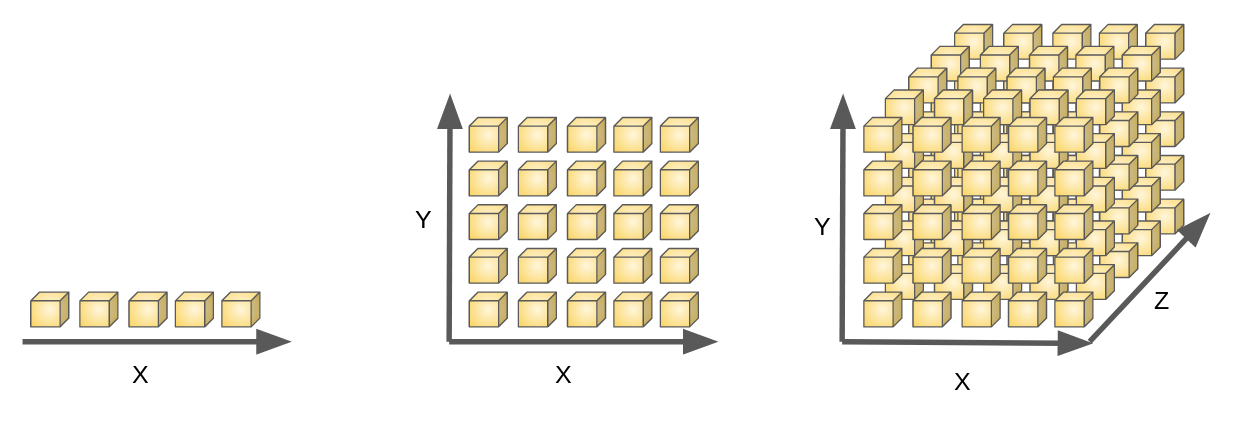

In [3]:
Image("figures/curse_of_dimensionality.png")

上図（https://medium.com/diogo-menezes-borges/give-me-the-antidote-for-the-curse-of-dimensionality-b14bce4bf4d2 より） は次元が増えるとともに空間が爆発的に広がることを直感的に描いている。
この図に描かれているように、一つ一つの変数の定義域が限られていても変数が増えるごとに指数関数に従ってデータ空間は広がっていく。同程度のデータ点数であった場合、次元が上がるごとにどんどんスパースになっていき、解空間はどんどん広がっていく。

- Q. データが入っている箱の数(割合)はどうなるでしょうか？

機械学習アルゴリズムの性質として、基本的には解空間の広さに対して十分なデータが必要であり、そうでなければ過学習を起こしやすい。
これを直感的に説明すると、解空間が広い場合は往々にしてデータに対して「それなりにあてはまる」解が膨大に存在してしまう。機械学習において重要なポイントの一つは手元にあるデータから本質的な現象とノイズ事象を切り分けることであるが、データが疎になってしまうと一つ一つのデータ点で起きたことが本質的によく起きる事象なのかが不明瞭になり、良い統計モデルを学習することができないという状況に陥ってしまうのである。

- いろんな線の引き方
- 損失関数の台地

#### 多重共線性(モデルの安定性という文脈で)


多重共線性とはデータが含む複数の説明変数の間に強い相関があるような性質を指す。実データにおいてはこういった状況は多く見られる（センサーデータであればアクセルと加速度センサー、など？）。多重共線性がある場合、同じ現象を複数の変数のいずれを使っても説明できるせいでモデルが不安定になりやすい。
（詳しくは https://www.ydc.co.jp/column/mi/20190410m.html などを参照）

### 可視化

多次元の現象はグラフなどの一目で見て理解できる形に可視化するのが非常に難しい。
紙やディスプレイにプロットする場合には2次元のデータしか正確には描くことができない。インタラクティブな可視化を用いるとしても限界があるだろう。

## 主要な手法について

ここでは主要な手法について触れていく。

### 行列分解系

入力のデータの行列をサイズの小さな行列の積で近似できるように行列分解を行うことでより低次元での表現を行う手法である。
分解の仕方は様々にあるが、それぞれに低次元で表現する際に着目するデータ上の特徴が異なるため、データの性質や目的に応じて選択する。

#### Principal Component Analysis (PCA、主成分分析)

データの行列 $X$ から分散を最大化するようなベクトル空間に写像する線型写像をデータから学習する。
(主成分と呼ばれる)
アイデアのシンプルさと適用できるデータの種類の広さからこの手法は広く使われている。これについては後の項で詳しく述べる。

#### Latent Dirichlet Allocation (LDA)

自然言語データに対してよく用いられる手法である。文書集合データを単語のトピック・トピックの特徴行列に分解する。
各文書が隠れた「トピック」を持ち、それに従って単語を生成するというモデルを前提にした手法である。
**離散データであれば適用可能**で、言語以外にもECサイトの購買記録などのトランザクションデータから顧客・商品の特徴を抽出するために使われることもある。

### 非線形な手法

ここまで述べた次元削減手法はいずれも線形写像を用いていたが、非線形な写像を行うものも存在する。

#### tSNE(距離保存系)

データ点同士の距離がある程度の確率で維持されるような非線型写像を学習する。

#### Faeture Agglomeration

特徴量同士の階層的クラスタリングを行い、その結果を用いて次元を削減する。

#### Multidimensional Scaling (MDS、多次元尺度法)(距離保存系)

各データ点同士の距離を保ったまま、与えられた次元な空間内に各データ点を移す（各データ点と対応するより低次元な空間の座標を計算し、それらの点の間の距離が元の空間のものが維持されるようにする）。距離さえ定義されていれば数値データでなくとも適用可能である。
距離行列を行列分解。

### その他の手法

#### Random Projection(距離保存系)

上記の行列分解系の手法では元のデータを近似するような、また写像が何らかの性質を持つような線型写像を求めていたが、これに対して__ランダムに__生成された行列を用いて写像を行う手法が Random Projection である。
元データのデータ点同士の距離を近似的に保つような写像が存在することは理論的に知られており、経験的にはランダムな写像を用いても異なるデータ同士を分離したまま次元を減らすことができる。

各手法の特徴を以下の表にまとめた。

|手法名| 手法の概要 | 適用可能なデータ | データサイズ |
|--|--|--|--|
|PCA|分散最大化する写像を得る行列分解 | 連続データ | 中程度までスケールする |
|LDA |潜在ディリクレモデルを仮定した行列分解 | 離散データ | 中程度までスケールする |
|Random Projection |ランダム写像 | 連続のデータ | 非常に高速 |
|MDS	|距離を維持する写像 | 距離が定義できるデータ | 中程度までスケールする |
|t-SNE	|類似度を確率的に維持する写像	| 任意のデータ | スケールしない |
|Feature Agglomeration |特徴量の階層的クラスタリング| **特徴量間の**距離が定義できるデータ| スケールしない|

## PCA について

PCA についてより詳細に解説する。

まずは iris データに対してPCAを実行した例を見ていく。

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

### データ準備 ###
from sklearn import datasets # データセット

iris = datasets.load_iris() # データをロード

X = iris.data # 特徴量(花びらの長さなど)
y = iris.target # アヤメの種類(3種類)
target_names = iris.target_names # 列の名前

df = pd.DataFrame(X) # 特徴量のDataFrameを作成
df.columns = iris.feature_names # 列名を設定

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


上記のデータでは変数が4つあるため、一目で全体が見えるように可視化することができない。

このデータに対して2つの主成分ベクターを得るように PCA を実行する。

In [5]:
from sklearn.decomposition import PCA # 主成分分析用のモジュール

In [6]:
pca = PCA(n_components=2) # インスタンスを作成

In [7]:
pca.fit(X) # 主成分を計算

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
X_r = pca.transform(X) # Xを主成分に分解, X_rに代入

In [9]:
pd.DataFrame(X_r, columns=["pc1", "pc2"]) # 主成分に分解されたデータをDataFrameに

,pc1,pc2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
5,-2.280860,0.741330
6,-2.820538,-0.089461
7,-2.626145,0.163385
8,-2.886383,-0.578312
9,-2.672756,-0.113774


こうして2つの主成分ベクターが得られる。

二次元のデータなので、簡単に散布図としてプロットすることが可能だ。

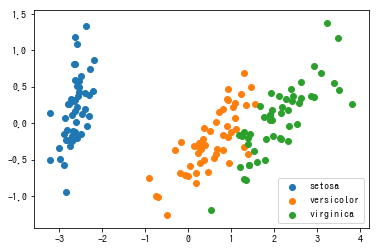

In [10]:
for flowerType, target_name in zip([0, 1, 2], target_names):
    plt.scatter(X_r[y == flowerType, 0], 
                X_r[y == flowerType, 1], label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

上記の散布図は目的変数であるspeciesで色分けしてある。PCA によって二次元に縮約されているがそれぞれの種のデータ点が存在する領域は全体としては分かれているということが見て取れる。上で述べた通りこの計算に際してspeciesの情報は用いておらず、特徴量となる花の各部位の大きさだけからこれを計算している。

これから PCA について以下のような事項を論じていこう。

  - PCA の原理: どうしてこのように情報をうまく保存して計算できるのか？
  - 弱点: どのようなデータに対してはうまくいかないのか？
  - 発展的な手法: 

### PCA の原理

PCA の根本的なアイデアを直感的に述べるならば __データのばらつきが大きく広がって見える方向からデータを見ていけば、より全体をよく捉えることができるだろう__ という考え方だ(分散の最大化)。この考え方に基づいて、PCAはデータから

1. 第一主成分の分散を最大化する
0. 続く主成分はそれまでに決定した主成分と直交するという拘束条件の下で分散を最大化する

という性質を持つように指定された数の主成分を求める。

$i$番目のデータ点の第 $k$ 主成分 $\mathbf{t}_k(i)$ は、データ点ベクトル $\mathbf{x}_i$ とそれぞれの主成分に対応する負荷量ベクトル $\mathbf{w}_k$ の内積$\mathbf{x}_i\mathbf{w}_k$として表される。
**ベクトル写像**

負荷量ベクトルは単位ベクトルである。

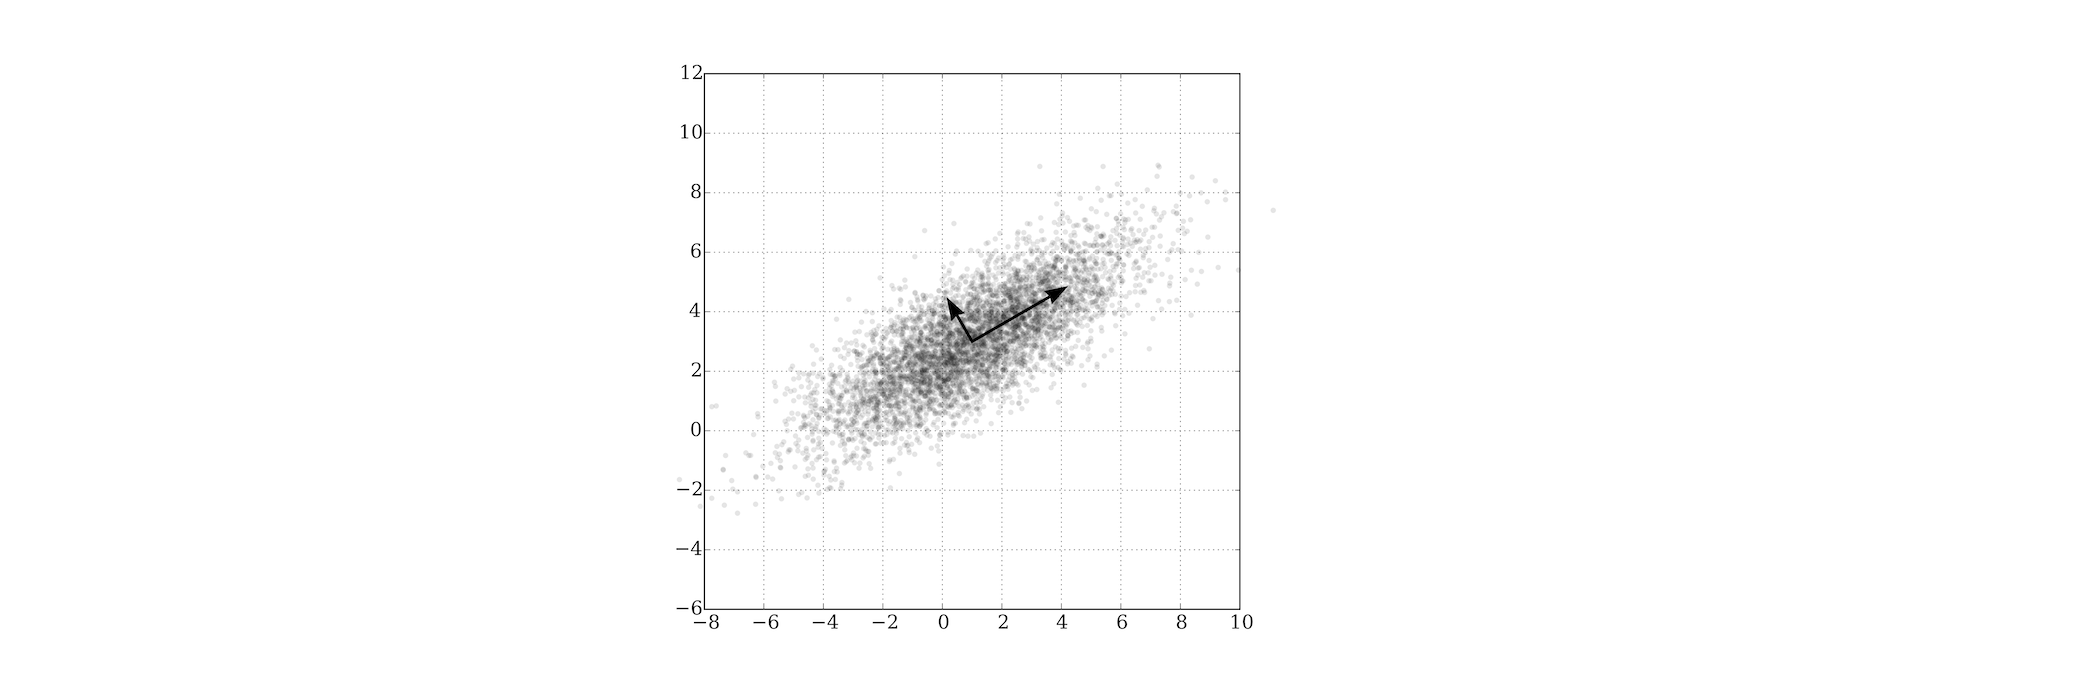

In [11]:
Image("figures/1920px-GaussianScatterPCA.png")

このようなベクトルを求める問題は、データ行列$X$の共分散行列の固有値分解、あるいは$X$の特異値分解(Singular Value Decomposition, SVD)と同値になる。しばしば PCA は SVD によって実装される。
これらの同値性については解説しないが、ネットで見られる資料としては https://ja.wikipedia.org/wiki/主成分分析 にある。

### 寄与率

主成分分析を行った際、各主成分がどの程度元のデータを説明しているのかを知るために説明付き分散(explained variance、寄与率とも呼ばれる）を用いることができる。これは元のデータの分散にどの程度各主成分の分散が寄与しているかの指標である。

下では、今回のアヤメのデータに関してPCAを行った結果の寄与率のプロットを作成している。主成分1で元のデータの分散の90%近くを説明できていることがわかる。


In [12]:
pca.components_ # 主成分の係数

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [13]:
pca.explained_variance_ratio_ # 各主成分の説明する分散の割合

array([0.92461872, 0.05306648])

In [14]:
pca.explained_variance_ # 各主成分の説明する分散

array([4.22824171, 0.24267075])

<BarContainer object of 4 artists>

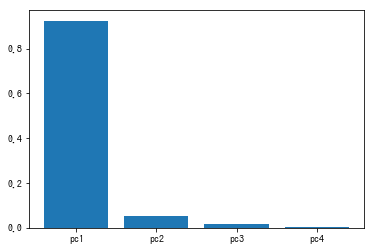

In [15]:
# 寄与率
pca = PCA(n_components=4)
pca.fit(X)
plt.bar(
    [n for n in range(1, len(pca.explained_variance_ratio_)+1)],
    pca.explained_variance_ratio_,
    tick_label=[f'pc{i}' for i in range(1, 5)]
)

### 弱点

PCA には以下のような弱点・注意点がある。

  - PCA は分散を元にした手法であるため、変数間のスケールの違いに弱い。これを避けるためには事前にデータの正規化を行う。
      - すごく大きな分散をもつデータがあった場合は、特に正規化を行う。
  - 主成分の解釈が難しい
  - 寄与率の大きな主成分が多いデータの場合は次元削減は使えない


### 発展的な手法

PCA では対応しづらいデータに対応するための発展手法について簡単に触れる。

#### Kernel PCA

Kernel PCA はカーネル関数による変換を組み込むことで非線形なデータの次元削減に用いられるように考えられた手法である。

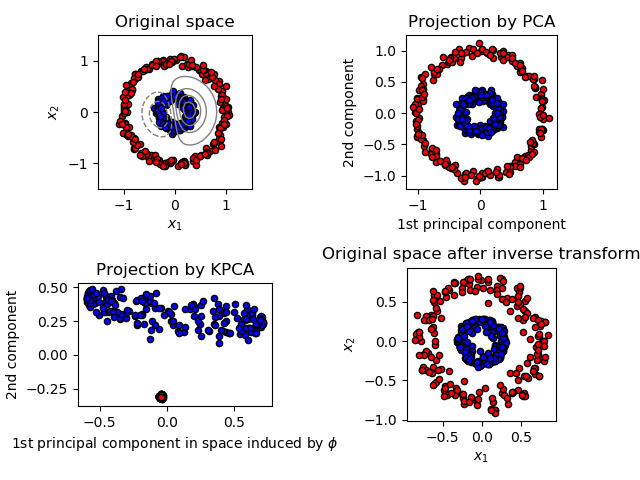

In [16]:
Image("figures/sphx_glr_plot_kernel_pca_001.png")

## sklearn/Pytorchを用いた次元削減

In [17]:
# 次元削減の前に、正規化を行っておく。
# 広く使われる方法は、平均と標準偏差で正規化を行う方法で、
# Standard Scalingと呼ばれる
X_norm = (X - X.mean(axis=0))/X.std(axis=0)

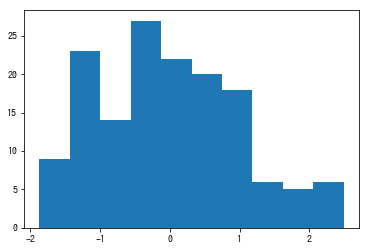

In [18]:
plt.hist(X_norm[:,0], bins=10); # -1や1を超える値も見られる

In [19]:
# 最大/最小で正規化を行う方法もある。こちらはMin-Max Scalingと呼ばれる
X_norm_minmax = (X - X.min(axis=0))/(X.max(axis=0) - X.min(axis=0)) - 0.5

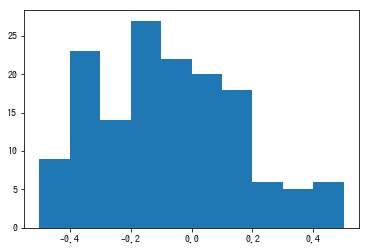

In [20]:
plt.hist(X_norm_minmax[:,0], bins=10); # -0.5 ~ 0.5の範囲に全て収まる

### PCA(再掲)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

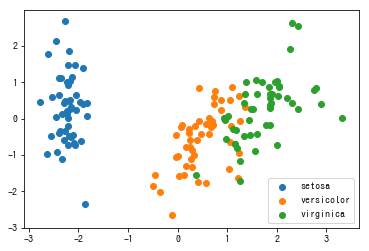

In [22]:
for flowerType, target_name in zip([0, 1, 2], 
                                 target_names):
    plt.scatter(X_pca[y == flowerType, 0],
                X_pca[y == flowerType, 1],
                label=target_name)
plt.legend()

In [23]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

### KernelPCA

カーネルトリックを用いて、非線形な関係にも対応できるように工夫したPCA。

In [24]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel="rbf", 
                random_state=42)
kpca.fit(X_norm)
X_kpca = kpca.transform(X_norm)

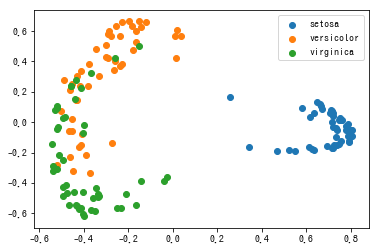

In [25]:
for flowerType, target_name in zip([0, 1, 2], 
                                 target_names):
    plt.scatter(X_kpca[y == flowerType, 0],
                X_kpca[y == flowerType, 1],
                label=target_name)
plt.legend()

カーネルPCAの場合は、通常の主成分のように、  
$$主成分 = a_1 x_1 + a_2 x_2 + ... a_p x_p$$
という線形な形で主成分を表すことはできない。

### SparsePCA

なるべくスパースな主成分を導出するように調整されたPCA。

In [26]:
from sklearn.decomposition import SparsePCA
spca = SparsePCA(n_components=2)
spca.fit(X_norm)
X_spca = spca.transform(X_norm)

/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


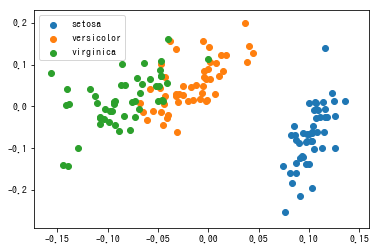

In [27]:
for flowerType, target_name in zip([0, 1, 2], 
                                 target_names):
    plt.scatter(X_spca[y == flowerType, 0],
                X_spca[y == flowerType, 1],
                label=target_name)
plt.legend()

In [28]:
spca.components_ # 1行目が1つめの主成分、2行目が2つ目の主成分

array([[-10.8138294 ,   0.        , -10.85787007, -10.83258218],
       [ -1.32503014, -11.23711922,   0.66338518,   0.        ]])

通常のPCAに比べて、0が多い(=スパースな)主成分となっている。

In [29]:
# 通常のPCAの主成分。1行目が1つめの主成分、2行目が2つ目の主成分
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

### Random Projection

#### GaussianRandomProjection

平均0, 分散$\frac{1}{目標次元数}$の正規分布に従うような乱数で、行列を作成し、それをかける。

In [30]:
from sklearn import random_projection
rp = random_projection.GaussianRandomProjection(n_components=2)
X_rp_g = rp.fit_transform(X_norm)

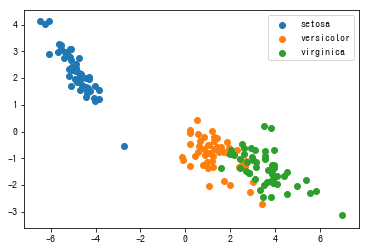

In [31]:
for flowerType, target_name in zip([0, 1, 2], 
                                 target_names):
    plt.scatter(X_rp_g[y == flowerType, 0],
                X_rp_g[y == flowerType, 1],
                label=target_name)
plt.legend()

#### SparseRandomProjection

乱数行列をスパースな乱数行列に置き換えることで、上述のGaussian Random Projecttionを省メモリ化&高速化したもの。

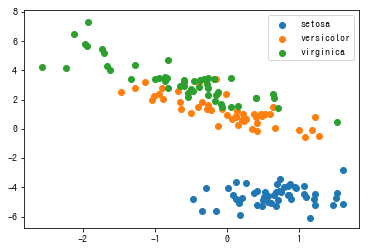

In [31]:
rp = random_projection.SparseRandomProjection(n_components=2)
X_rp_s = rp.fit_transform(X_norm)
for flowerType, target_name in zip([0, 1, 2], 
                                 target_names):
    plt.scatter(X_rp_s[y == flowerType, 0],
                X_rp_s[y == flowerType, 1],
                label=target_name)
plt.legend()

### Feature Agglomeration

Feature Agglomerationは、変数に対して階層クラスタリングを使用して、変数をまとめる(凝集する)ことで、次元削減を行う方法である。

In [32]:
from sklearn.cluster import FeatureAgglomeration

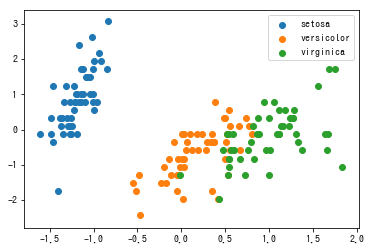

In [33]:
fa = FeatureAgglomeration(n_clusters=2)
X_fa = fa.fit_transform(X_norm)
for flowerType, target_name in zip([0, 1, 2], 
                                 target_names):
    plt.scatter(X_fa[y == flowerType, 0],
                X_fa[y == flowerType, 1],
                label=target_name)
plt.legend()

### MDS

先述の通り、MDS(多次元尺度構成法)は、データ間の距離がなるべく保存されるようにしながら、変数の数を減らすアルゴリズムの一つである。

In [34]:
from sklearn.manifold import MDS

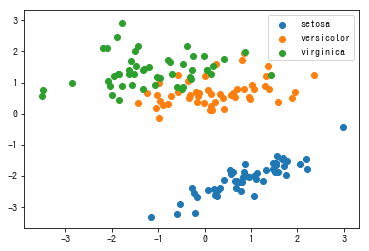

In [35]:
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X_norm)
for flowerType, target_name in zip([0, 1, 2], 
                                 target_names):
    plt.scatter(X_mds[y == flowerType, 0],
                X_mds[y == flowerType, 1],
                label=target_name)
plt.legend()

### tSNE

tSNEもMDS同様、データ間の距離がなるべく保存されるようにしながら、変数の数を減らすアルゴリズムの一つである。  
ただし、MDSのようにデータ間の距離を「ユークリッド距離」や「予め計算された距離行列」で与えるのではなく、「距離が混合ガウス分布にしたがう」という仮定を置いて処理する。

In [36]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_norm)

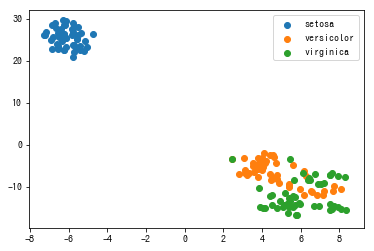

In [39]:
for flowerType, target_name in zip([0, 1, 2], 
                                 target_names):
    plt.scatter(X_tsne[y == flowerType, 0],
                X_tsne[y == flowerType, 1],
                label=target_name)
plt.legend()

### (Optional)Autoencoder

Autoencoder(オートエンコーダ)は、自分自身を返すような、中間層を含むニューラルネットワークモデルを作成し、中間層の値を次元削減された値として取り出す方法である。  
中間層のニューロンユニットの数が、次元削減後の変数の数となる。

Autoencoderによって得られた成分は、ニューラルネットワークの活性化関数の特性上、0以上の値となる。

scikit-learnにはAutoencoderは無いので、PyTorchで作成する。  
PyTorchは現在、Tensorflowと並んで最もよく用いられるディープラーニング用ライブラリであり、その使いやすさから、今後Tensorflow以上に普及するものと期待される。  
今回は最も簡単な、中間層が1層のAutoencoderを作成した。

なお、PyTorchは以下のコマンドでインストールできる  
`conda install pytorch -c pytorch`

In [40]:
from torch import nn, Tensor, optim # Pytorchの各種モジュールを読み込み

In [41]:
# Autoencoderのクラスを作成。
class autoencoder_model(nn.Module):
    def __init__(self):
        super(autoencoder_model, self).__init__() # おまじない
        # エンコーディング層。4変数 -> 2変数(活性化関数はReLU)
        self.encoder = nn.Sequential(
            nn.Linear(4, 2),
            nn.ReLU(True))
        
        # デコーディング層。2変数 -> 4変数
        self.decoder = nn.Sequential(
            nn.Linear(2, 4))
        
    def forward(self, x): # 出力を計算する関数。PyTorchのモデルは必ずforward関数が必要。
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
class AutoEncoder(): # scikit-learnライクな自作クラスを作成
    def __init__(self, lr=1e-1, weight_decay=1e-5, n_epoch=1000):
        self.model = autoencoder_model() # Autoencoderインスタンスを作成
        self.criterion = nn.MSELoss() # 誤差関数としてMSE(平均2乗誤差)を使用
        # 最適化インスタンスを作成。最適化のアルゴリズムとしてはAdamを使用。
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr,
                        weight_decay=weight_decay)
        self.n_epoch = n_epoch
    
    def fit(self, X):
        tensor_X = Tensor(X) # データをtorch.Tensorのフォーマットに変更
        for epoch in range(self.n_epoch): # (n_epoch)回分、パラメータを更新(学習)
            # 予測
            output = self.model(tensor_X)
            loss = self.criterion(output, tensor_X)
            # 修正
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        return self
            
    def predict(self, X):
        tensor_X = Tensor(X)
        return self.model.encoder(tensor_X).detach().numpy()
    
    def fit_predict(self, X):
        return self.fit(X).predict(X)

In [42]:
ae = AutoEncoder() # AutoEncoderインスタンスを作成
X_ae = ae.fit_predict(X_norm)

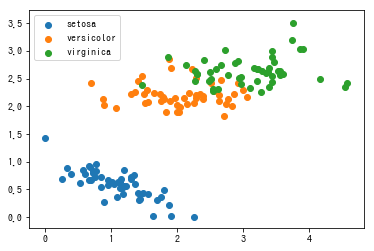

In [43]:
for flowerType, target_name in zip([0, 1, 2], 
                                 target_names):
    plt.scatter(X_ae[y == flowerType, 0],
                X_ae[y == flowerType, 1],
                label=target_name)
plt.legend()

2成分ともに、0以上の値となっていることが見て取れる。

## 宿題

- センサーデータについて、以下の6つのペアについて、以下の各アルゴリズムで次元削減を行い、その結果を散布図で描写してください。
    - PCA
    - KernelPCA
    - SparsePCA
    - Random Projection(Sparseの方を使用)
    - MDS
    - tSNE
    - Feature Agglomeration

- センサーのペア
    - ("Steering Wheel Absolute Angle", "Yaw Rate 1(learmed data)")
    - ("Engine Speed", "Yaw Rate 1(learmed data)")
    - ("Engine Speed", "Vehicle Speed")
    - ("Lateral Sensor Value", "Yaw Rate 1(learmed data)")
    - ("Vehicle Speed", "Turn Left SW")
    - ("Fuel Level Percent Average", "Acceleration Sensor Value")

### PCAの場合の回答例

In [42]:
# データを読み込む
import pandas as pd
import numpy as np


df_raw = pd.read_csv("../data/interim/20190605_CAN/103.486_CAR1V21_HDD2/Job1/"
                     + "SUZUKI_YSB-021_MRR_2016-04-20_06-27_0001.BLF.csv",
                     names=['vin', 'time1', 'time2', 'feature', 'value'])

# 読み替え表データ
df_feature_name = pd.read_csv("../data/interim/20190605_CAN/20190617_featureName.csv")
df_feature_name["key"] = df_feature_name["key"].str[2:]
feature_name_dict = df_feature_name.set_index("key")["featureName"].to_dict()

# 集約して横持ちに
df = (
    df_raw
    .assign(rounded_time2=np.round(df_raw.time2, 1)) # time2を小数点以下1桁(0.1)で丸めて rounded_time2 列とする
    .groupby(["vin", "time1","rounded_time2","feature"])["value"].median() # 中央値で集約
    .unstack(level=-1) # feature列について横積みにする
    .interpolate() # NA を線形補完する
    .dropna() # 残った NA （先頭にNAがあったケース）を除外する
)

# 読み替え
df = df.rename(columns=feature_name_dict)

In [43]:
# ペア一覧
sensors = ["Steering Wheel Absolute Angle", "Yaw Rate 1(learmed data)",
           "Engine Speed", "Vehicle Speed", "Lateral Sensor Value",
           "Turn Left SW", "Fuel Level Percent Average", "Acceleration Sensor Value"]

In [44]:
# Scaling
df_sub = df[sensors]
df_sub = (df_sub - df_sub.mean()) / df_sub.std() 

In [45]:
df_sub.head()

feature                         Steering Wheel Absolute Angle  \
vin time1        rounded_time2                                  
21  201604200627 0.9                                -0.162748   
                 1.0                                -0.162748   
                 1.1                                -0.162748   
                 1.2                                -0.162748   
                 1.3                                -0.162748   

feature                         Yaw Rate 1(learmed data)  Engine Speed  \
vin time1        rounded_time2                                           
21  201604200627 0.9                           -0.053467     -0.771130   
                 1.0                           -0.047083     -0.769633   
                 1.1                           -0.051339     -0.771728   
                 1.2                           -0.047083     -0.773524   
                 1.3                           -0.049211     -0.771728   

feature                         Vehicle Speed  Lateral Sensor Value  \
vin time1        rounded_time2                                        
21  201604200627 0.9                -0.814136             -0.081489   
                 1.0                -0.814136             -0.081489   
                 1.1                -0.814136             -0.081489   
                 1.2                -0.814136             -0.081489   
                 1.3                -0.814136             -0.081489   

feature                         Turn Left SW  Fuel Level Percent Average  \
vin time1        rounded_time2                                             
21  201604200627 0.9               -0.330778                    0.523464   
                 1.0               -0.330778                    0.523464   
                 1.1               -0.330778                    0.523464   
                 1.2               -0.330778                    0.523464   
                 1.3               -0.330778                    0.523464   

feature                         Acceleration Sensor Value  
vin time1        rounded_time2                             
21  201604200627 0.9                             0.113862  
                 1.0                             0.113862  
                 1.1                             0.113862  
                 1.2                             0.017306  
                 1.3                             0.113862

In [46]:
pca = PCA(n_components=2)
X2_pca = pca.fit(df_sub).transform(df_sub)
pd.DataFrame(X2_pca, columns=['pc1', 'pc2']).head()

,pc1,pc2
0,0.163588,-1.059500
1,0.159628,-1.058222
2,0.162247,-1.059838
3,0.166071,-1.088696
4,0.160918,-1.059759


Text(0, 0.5, 'var_2')

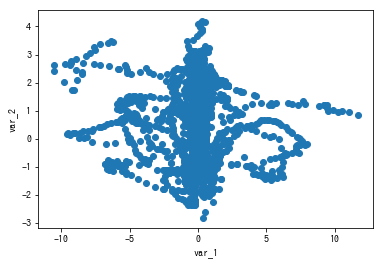

In [47]:
plt.scatter(X2_pca[:,0], X2_pca[:,1])
plt.xlabel("var_1")
plt.ylabel("var_2")